# Анализ динамики индикаторов IT сектора

## Описание исследования

Всемирный Банк (World Bank) имеет объемную обновляемую базу данных различных индикаторов по странам. Доступ к этим индикторам открыт, в т.ч к ним можно подключиться через API.

Меня заинтересовали некоторые индикаторы, которые характеризуют состояние IT сектора в стране и я решил провести их анализ, сравнив эти данные между различными странами за определеннный временной промежуток.

Выбор стран определен непосредственно моей страной проживания (РФ), парой соседних стран (Беларусь и Казахстан) и развитым западноевропейским государством (Германия).

**Индикаторы отобраны из списка Всемирного Банка по критериям:**
1. Доступности данных для всех стран исследования
2. Возможности их сравнения
3. Репрезентативности в качестве индикатора развития IT сектора

**Выбраны следующие индикаторы:**
- Лица, пользующиеся интернетом, % населения (IT.NET.USER.ZS)
- Экспорт услуг ИКТ, % экспорта услуг (BX.GSR.CCIS.ZS)
- Защищенные интернет-серверы, шт. на 1 млн. человек (IT.NET.SECR.P6)

**Подробное описание индикаторов**

**[IT.NET.USER.ZS](https://databank.worldbank.org/metadataglossary/world-development-indicators/series/IT.NET.SECR.P6):** люди, которые пользовались Интернетом (из любого места) в течение последних 3 месяцев. Интернетом можно пользоваться с помощью компьютера, мобильного телефона, персонального цифрового помощника, игровой приставки, цифрового телевизора и т. д.

**[BX.GSR.CCIS.ZS:](https://databank.worldbank.org/metadataglossary/world-development-indicators/series/BX.GSR.CCIS.ZS)** экспорт услуг в сфере информационных и коммуникационных технологий включает компьютерные и коммуникационные услуги (телекоммуникации, почтовые и курьерские услуги), а также информационные услуги (компьютерные данные и операции, связанные с новостями).

**[IT.NET.SECR.P6:](https://databank.worldbank.org/metadataglossary/world-development-indicators/series/IT.NET.SECR.P6)** Количество уникальных общедоступных сертификатов TLS/SSL, обнаруженных в ходе исследования Netcraft Secure Server. Принадлежность к стране определяется по местоположению хостинга.

### Цель исследования

Провести анализ нескольких индикаторов IT сектора вышеперечисленных стран. Оценить динамику изменений для каждой страны, сравнить показатели стран между собой и сделать выводы.

### Задачи

1. Подключиться к API Всемирного банка и выгрузить необходимые данные
2. Ознакомиться с данными, провести предобработку
3. Исследовать данные и сделать выводы

## Импорт данных и ознакомление

In [6]:
#Импортируем необходимые модули для работы
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.ticker as ticker
import warnings

In [8]:
warnings.filterwarnings("ignore")

Предварительно изучена документация api Всемирного банка, выписаны id необходимых индикаторов и коды стран.

Ссылка на документацию — [API World Bank Developer information](https://datahelpdesk.worldbank.org/knowledgebase/topics/125589)


In [10]:
#Переменная с id индикаторов
indicators = ['IT.NET.USER.ZS','BX.GSR.CCIS.ZS','IT.NET.SECR.P6']

In [12]:
#Переменная с кодами стран
countries = ['RUS','BLR', 'DEU', 'KAZ']

In [14]:
#Пустой df для сохранения всех данных
df = pd.DataFrame()

In [16]:
"""
Вложенный цикл для парсинга всех целевых индикаторов и стран в один датафрейм
1. Для каждой страны проходим по всем индикаторам
2. Создаем переменную со ссылкой на api, используем переменные со странами и id индикаторов, формат json
3. Переменная response для выгрузки данных
4. Переменная data для сохранения json
5. Временный датафрейм из json
6. Создаем отдельный столбец с названием индикатора
7. Соединяем все данные в один df
"""
for country in countries:
    for indicator in indicators:
        url = f"http://api.worldbank.org/v2/country/{country}/indicator/{indicator}?date=2000:2023&format=json&per_page=1000"
        response = requests.get(url)
        data = response.json()
        temp_df = pd.DataFrame(data[1])
        temp_df['indicator'] = indicator
        df = pd.concat([df, temp_df], ignore_index=True)

Данные собраны в один df. Ознакомимся с ними.

In [18]:
display(df.head(), df.tail())

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,IT.NET.USER.ZS,"{'id': 'RU', 'value': 'Russian Federation'}",RUS,2023,92.2450,,,0
1,IT.NET.USER.ZS,"{'id': 'RU', 'value': 'Russian Federation'}",RUS,2022,90.4180,,,0
2,IT.NET.USER.ZS,"{'id': 'RU', 'value': 'Russian Federation'}",RUS,2021,88.2138,,,0
3,IT.NET.USER.ZS,"{'id': 'RU', 'value': 'Russian Federation'}",RUS,2020,84.9947,,,0
4,IT.NET.USER.ZS,"{'id': 'RU', 'value': 'Russian Federation'}",RUS,2019,82.6422,,,0


,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
283,IT.NET.SECR.P6,"{'id': 'KZ', 'value': 'Kazakhstan'}",KAZ,2004,NaN,,,0
284,IT.NET.SECR.P6,"{'id': 'KZ', 'value': 'Kazakhstan'}",KAZ,2003,NaN,,,0
285,IT.NET.SECR.P6,"{'id': 'KZ', 'value': 'Kazakhstan'}",KAZ,2002,NaN,,,0
286,IT.NET.SECR.P6,"{'id': 'KZ', 'value': 'Kazakhstan'}",KAZ,2001,NaN,,,0
287,IT.NET.SECR.P6,"{'id': 'KZ', 'value': 'Kazakhstan'}",KAZ,2000,NaN,,,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        288 non-null    object 
 1   country          288 non-null    object 
 2   countryiso3code  288 non-null    object 
 3   date             288 non-null    object 
 4   value            243 non-null    float64
 5   unit             288 non-null    object 
 6   obs_status       288 non-null    object 
 7   decimal          288 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 18.1+ KB


Данные содержат 8 столбцов и 288 строк. При этом есть лишние столбцы.

Также замечены пропуски в столбце `value`, на этапе предобработки проверим к чему они относятся.


## Предобработка данных

### Лишние столбцы

В данных есть столбцы, содержание которых не пригодится для анализа, оставим только нужные столбцы — `indicator`, `countryiso3code`, `date`, `value`

In [25]:
#Создаем переменную со списком необходимых столбцов
columns = ['indicator', 'countryiso3code', 'date', 'value']

In [27]:
#Оставлям только эти столбцы в df
df = df[columns]

In [29]:
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        288 non-null    object 
 1   countryiso3code  288 non-null    object 
 2   date             288 non-null    object 
 3   value            243 non-null    float64
dtypes: float64(1), object(3)
memory usage: 9.1+ KB


,indicator,countryiso3code,date,value
0,IT.NET.USER.ZS,RUS,2023,92.2450
1,IT.NET.USER.ZS,RUS,2022,90.4180
2,IT.NET.USER.ZS,RUS,2021,88.2138
3,IT.NET.USER.ZS,RUS,2020,84.9947
4,IT.NET.USER.ZS,RUS,2019,82.6422


None

Лишние столбцы успешно обработаны.

### Обработка пропусков

Ознакомимся с пропущенными данными.

In [31]:
#Суммируем пропуски для каждого столбца
df.isna().sum()

indicator           0
countryiso3code     0
date                0
value              45
dtype: int64

Значение индикаторов пропущено в 45 строках из 288.

Проверим в каких конкретно строках есть пропуски.

In [33]:
#Выводим строки df с пропусками в value
df[df['value'].isna()]

,indicator,countryiso3code,date,value
62,IT.NET.SECR.P6,RUS,2009,NaN
63,IT.NET.SECR.P6,RUS,2008,NaN
64,IT.NET.SECR.P6,RUS,2007,NaN
65,IT.NET.SECR.P6,RUS,2006,NaN
66,IT.NET.SECR.P6,RUS,2005,NaN
67,IT.NET.SECR.P6,RUS,2004,NaN
68,IT.NET.SECR.P6,RUS,2003,NaN
69,IT.NET.SECR.P6,RUS,2002,NaN
70,IT.NET.SECR.P6,RUS,2001,NaN
71,IT.NET.SECR.P6,RUS,2000,NaN


У индикатора `IT.NET.SECR.P6` нет данных с 2000 по 2009 годы. У оставшихся двух индикаторов пропущены данные по Беларуси в 2022 и 2023 годах.

Пропущенные строки можно удалить, данных там нет, на результаты анализа это не повлияет.

In [35]:
#Удаляем строки с пропущенными значениями
df = df.dropna()

In [37]:
#Суммируем пропуски для каждого столбца
df.isna().sum()

indicator          0
countryiso3code    0
date               0
value              0
dtype: int64

Пропуски успешно обработаны.


### Процент роста

Для анализа динамики будет полезным добавить столбец с процентом роста показателя, относительно предыдущего года.

Этот показатель будем анализировать  рассматривать только для России, поэтому добавим новый столбец df, где для каждого индикатора для РФ укажем процент изменения показателя, относительно предыдущего года.

In [39]:
"""
1. Фильтруем датафрейм, выбираем только РФ
2. Сортируем по году
3. Группируем данные по индикатору
4. Вычисляем процент изменения
"""
df['change_percent'] = df[df['countryiso3code'] == 'RUS'] \
    .sort_values(by='date') \
    .groupby(['indicator'])['value'] \
    .transform(lambda x: x.pct_change() * 100).round(2)

In [41]:
#Проверяем наличие столбца и правильность показателей
df.head()

,indicator,countryiso3code,date,value,change_percent
0,IT.NET.USER.ZS,RUS,2023,92.2450,2.02
1,IT.NET.USER.ZS,RUS,2022,90.4180,2.50
2,IT.NET.USER.ZS,RUS,2021,88.2138,3.79
3,IT.NET.USER.ZS,RUS,2020,84.9947,2.85
4,IT.NET.USER.ZS,RUS,2019,82.6422,2.20



Предобработка данных завершена. Можно перейти к исследовательскому анализу.

В ходе предобработки были удалены лишние столбцы и строки с пропусками в данных, добавлен новый столбец для РФ, где показана динамика изменений показателя относительно предыдущего года.

## Исследовательский анализ данных

Анализировать данные будем с помощью визуализаций. В данном случае хорошо подойдет линейный график со значениями индикатора по странам. Для каждого индикатора построим свой график. 

Для более подробного анализа динамики индикаторов для России, отдельно построим гистограмму.

Напишем функции для построения графиков.

In [43]:
def graph1(indicator, title, ylabel):
    #Настраиваем параметры первого графика
    fig, ax1 = plt.subplots(figsize=(12, 7))
    sns.set(style="whitegrid")    
    (sns.barplot(
        x='date', 
        y='value', 
        data = df[(df['countryiso3code'] == 'RUS') & (df['indicator'] == indicator)].sort_values('date'), 
        ax=ax1,
    ))
    #Настраиваем параметры второго графика
    ax2 = ax1.twinx()
    sns.lineplot(
        x='date', 
        y='change_percent',
        data=df[(df['countryiso3code'] == 'RUS') & (df['indicator'] == indicator)],
        ax=ax2, 
        color='salmon', 
        marker='o',
        label = 'Изменение к прошлому году, %'
    )
    #Цикл для подписей на втором графике (изменение в % к прошлому году)
    for i, row in df[(df['countryiso3code'] == 'RUS') & (df['indicator'] == indicator)].iterrows():
        if pd.notna(row['change_percent']):
            text = ax2.text(
                row['date'], 
                row['change_percent'] + 0.5,  # Поднятие аннотации немного выше
                f"{row['change_percent']:.0f}%", 
                color='black', 
                ha='center', 
                va='bottom',
                fontsize=9
            )
            #Настройка обводки текста
            text.set_path_effects([
                path_effects.Stroke(linewidth=3, foreground='white'),  # цвет обводки
                path_effects.Normal()
            ])
    
    #Настрока подписей
    ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
    ax1.set_xlabel('Год')
    ax1.set_ylabel(ylabel)
    ax2.set_ylabel('Изменение к прошлому году, %')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    
    #Заголовок и отображение графика
    plt.legend(loc='upper right', bbox_to_anchor=(0.80, 1.01))
    plt.title(title)
    plt.grid()
    plt.show()

In [45]:
def graph2(indicator, title, ylabel):
    #Устанавливаем стиль графика
    sns.set(style="whitegrid")    

    #Задаем размеры, данные по осям, другие настройки
    plt.figure(figsize=(13, 7))
    sns.lineplot(data=df[df['indicator'] == indicator].sort_values(by='date') , x='date', y='value', hue='countryiso3code', marker='o')
    
    #Заголовок, подписи осей, легенды
    plt.title(title)
    plt.xlabel('Год')
    plt.ylabel(ylabel)
    plt.legend(title='Код страны')
    plt.xticks(rotation=45)
    plt.show()

### Лица, пользующиеся интернетом, % населения

Построим график и проведем анализ динамики значений индикатора и сравним его по странам.

Сначала оценим динамику изменений только по России.

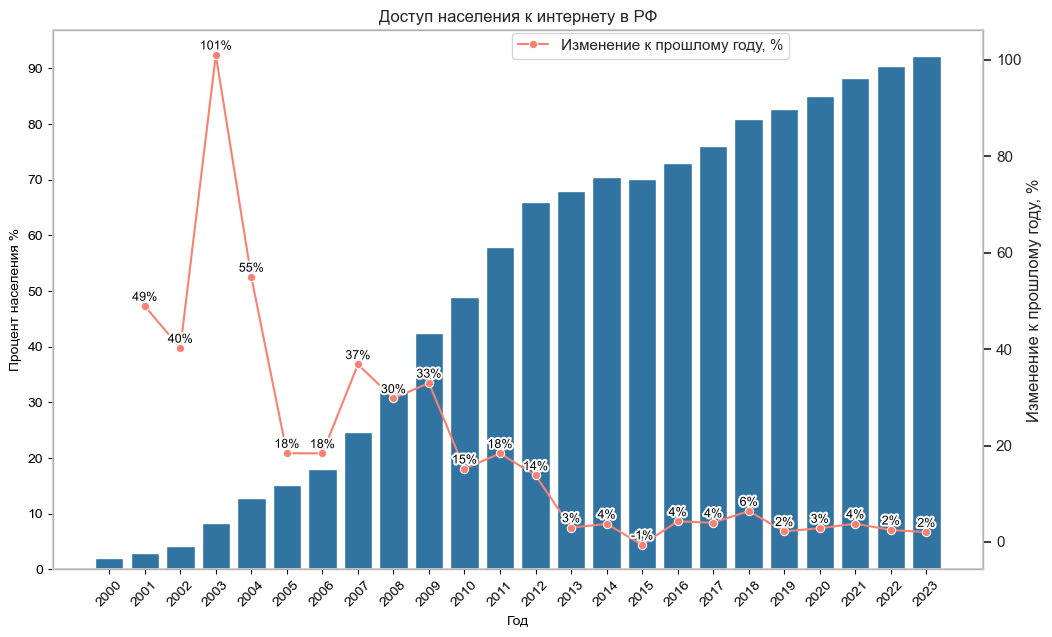

In [47]:
graph1('IT.NET.USER.ZS', 'Доступ населения к интернету в РФ', 'Процент населения %')

На начало периода (2000 г.) менее 5% населения пользовались интернетом. Вплоть до 2012 г. отмечается рост показателя двузначными темпами, а в 2003 г. - трехзначными (101%). Такой быстрый рост связан с эффектом низкой базы и повсеместным появлением возможности подключения к интернету в РФ, развитием мобильного интернета.

В 2013 году уже более 65% населения пользовались интернетом. С 2013 по 2023 годы показатель рос намного более низкими темпами, что связано с уже достаточно высоким уровнем интернеторизации. Тем не менее рост был стабилен (кроме падения на 1% в 2015 г., что может быть связано с санкциями, падением экономики и доходов населения) и к 2023 году более 90% населения имеют доступ ко всемирной паутине.

Сравним эти данные с другими странами.

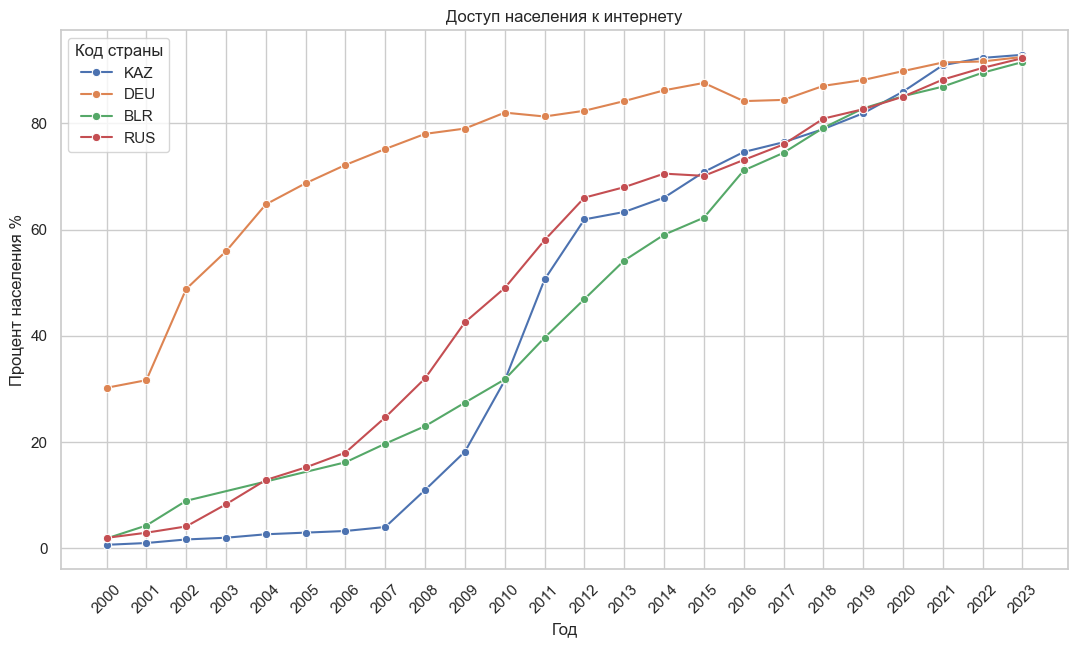

In [56]:
graph2('IT.NET.USER.ZS', 'Доступ населения к интернету', 'Процент населения %')

В сравнении с другими странами на графике явно выделяется Германия. К 2000 году интернетом пользовались более 30% населения, когда во всех остальных рассматриваемых странах постсоветского пространства этот показатель был менее 5%. Германия явно лидировала по значению показателя вплоть до 2019 года, когда показатель у всех стран стал выше 80%. К концу периода (2023 год) уже нельзя выделить явного лидера. Уровень интернеторизации всех рассматриваемых стран стал очень высоким, значение индикатора всех стран достигло более 90%.

Что касается постсоветских стран, в 2000-е года Россия лидировала с заметным отрывом, а Казахстан сильно отставал, к 2016 году большого отрыва уже не было и процент населения, пользующихся интернетом был на высоком уровне и не сильно отличался, а к концу периода Казахстан даже вышел вперед и обогнал Германию.

**Вывод:** Россия, Казахстан и Беларусь сильно отставали от Германии вплоть до 2019 г., разрыв со временем сокращался. К 2023 г. все страны имеют высокий процент населения, пользующихся интернетом, Германия уже не является лидером.

### Экспорт услуг ИКТ, % экспорта услуг

Построим график и проведем анализ динамики значений индикатора и сравним его по странам.

Сначала оценим динамику изменений по России.

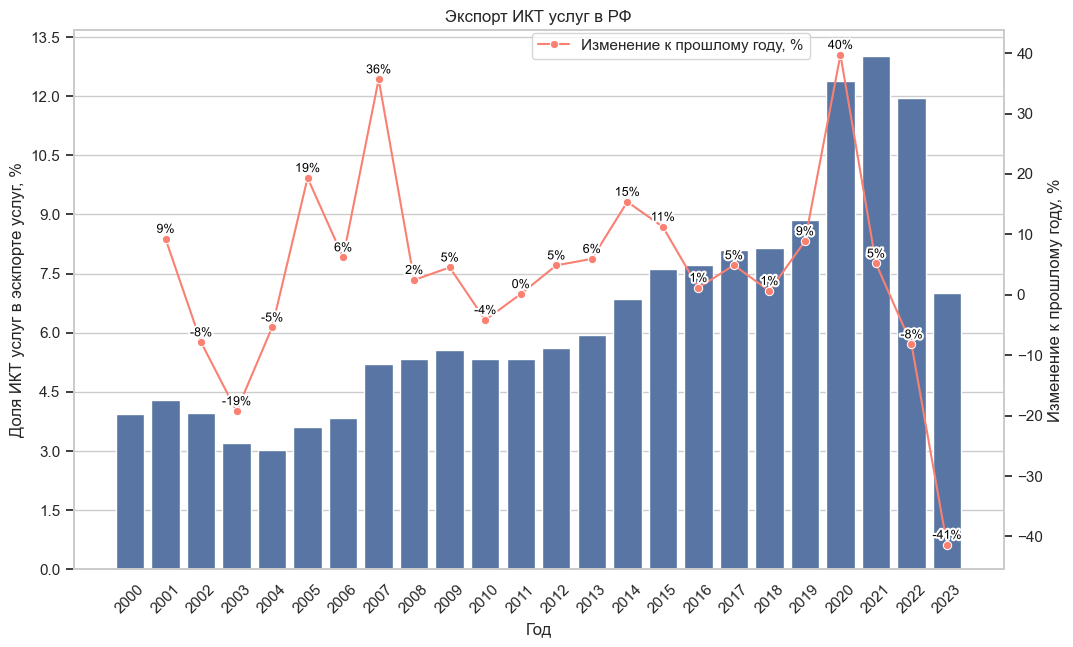

In [147]:
graph1('BX.GSR.CCIS.ZS', 'Экспорт ИКТ услуг в РФ', 'Доля ИКТ услуг в эскпорте услуг, %')

На начало периода (2000 г.) около 4% в экспорте услуг РФ составляли ИКТ услуги. В целом динамика показателя в исследуемый период положительна, но год от года она была разнонаправлена, в некоторые периоды доля снижалась. 

Пик приходится на 2021 год, когда доля экспорта услуг ИКТ достигла более чем 13%, после чего началось снижение, которое в 2023 году ознаменовалось резким обвалом (на 41%) до около 7%, это уровень 2014 года. Такое падение, очевидно, связано с санкциями против России.

В исследуемый период экономика России росла, как и экспорт, при этом рост доли экспорта ИКТ услуг показывает опержающее развитие IT сектора в России.

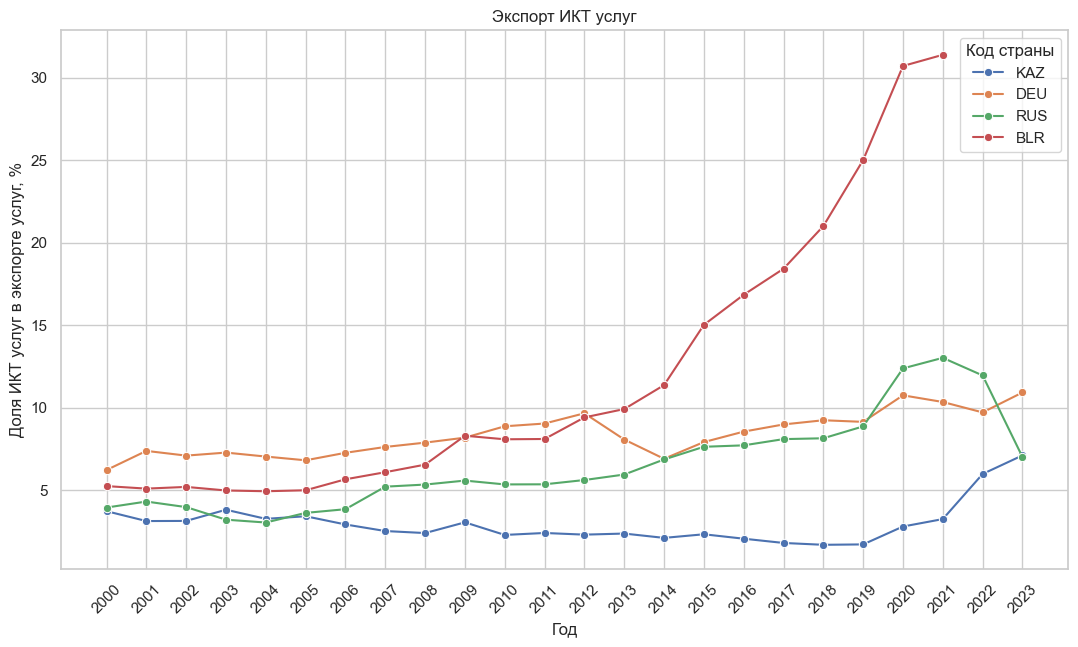

In [145]:
graph2('BX.GSR.CCIS.ZS', 'Экспорт ИКТ услуг', 'Доля ИКТ услуг в экспорте услуг, %')

Явного лидера, который бы значительно опережал другие страны в 2000-е не выделяется. Во всех странах, кроме Казахстана, доля экспорта ИКТ услуг растет. В Казахстане рост начался только после 2019 г. Лидером до 2013 г. была Германия, после чего ее опередила Беларусь, значение индикатора которой стало резко расти вплость до 2021 г, когда оно достигло более 30%. Данных за 2022 и за 2023 годы нет, но предполагаю, что также как в РФ, здесь будет резкое снижение из-за санкций.

Россия опередила Германию в 2020 году. В 2023, после резкого падения, доля экспорта ИКТ услуг в РФ упала ниже уровня Казахстана.

**Вывод:** Беларусь является абсолютным лидером по этому показателю, Россия опережала Германию и Казахстан, но после 2022 г. произошло резкое падение.

### Защищенные интернет-серверы, шт. на 1 млн. человек

Построим график и проведем анализ динамики значений индикатора и сравним его по странам.

Сначала оценим динамику изменений по России.

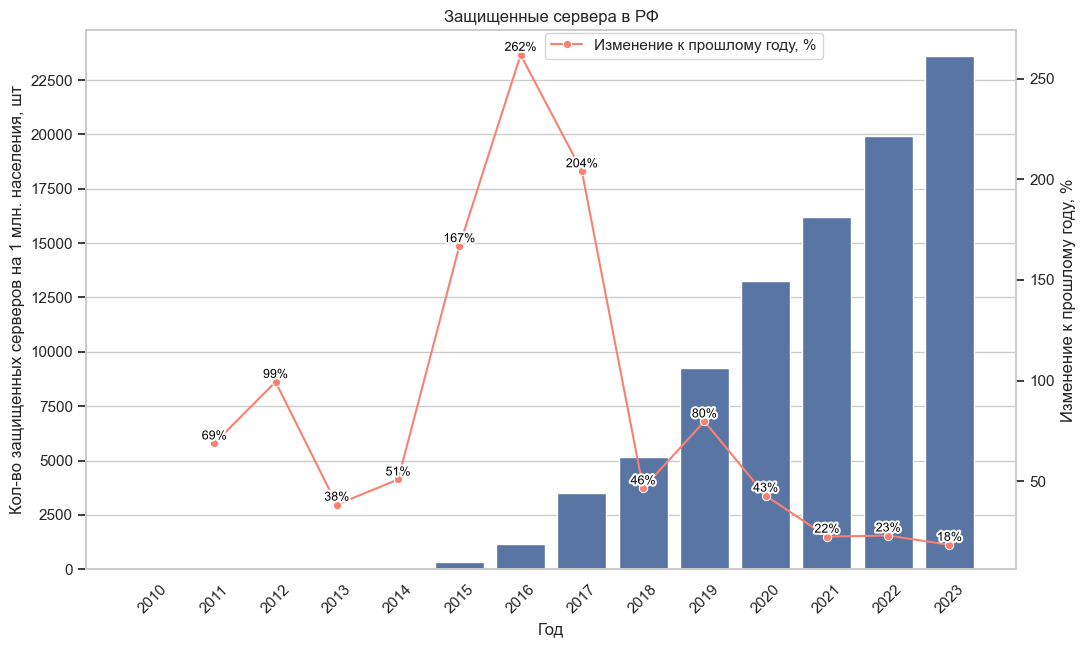

In [153]:
graph1('IT.NET.SECR.P6', 'Защищенные сервера в РФ', 'Кол-во защищенных серверов на 1 млн. населения, шт')

Данные по этому индикатору отслеживались с 2010 года. На начало периода показатель был незначителен, весь период наблюдается значительный рост показателя, который замедлился в последние годы. Замедление роста, очевидно, связано с уже досаточно высоким уровнем показателя.

Для оценки значения индикатора необходимо сравнение с другими странами.

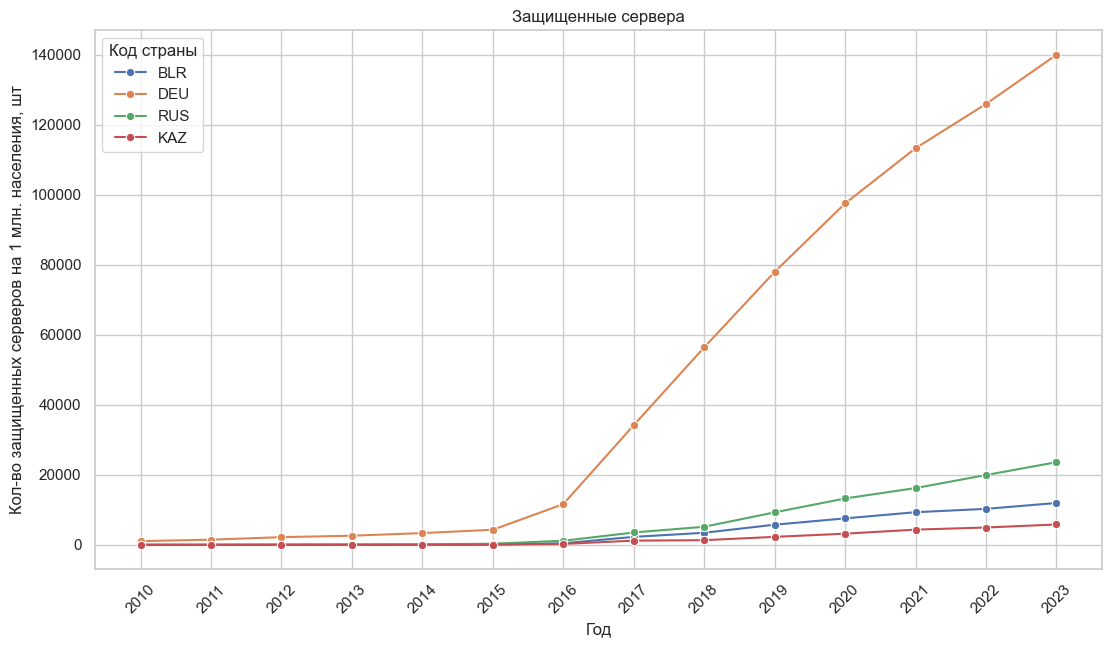

In [92]:
graph2('IT.NET.SECR.P6', 'Защищенные сервера', 'Кол-во защищенных серверов на 1 млн. населения, шт')

С начала периода большой разницы между показателями исследуемых стран не отмечается, при этом отмечается постепенно нарастающий отрыв Германии, который становится многократным, разница между Германией (1 место) и РФ (2 место) к 2023 г. более чем шестикратна.

Рост показателей всех стран устойчивый, снижения не наблюдается, при этом у Беларуси показатель ниже Казахстана. Большой отрыв Германии может быть связан с большим предложением услуг хостингов на ее территории. Принадлежность сервера к стране считается по местоположению хостинга, язык сайта и доменная зона не учитываются. Поэтому более низкие показатели рассматриваемых стран СНГ, вероятно, связаны с ограниченным предложением услуг хостинга.

**Вывод:** Среди стран СНГ РФ значительно опережает Казахстан и Беларусь. Германия является абсолютным лидером по значению показателя, что связано с большим кол-вом востребованных услуг хостинга сайтов на ее территории.

**Общий вывод**: в совокупности, по значениям проанализированных индикаторов сложно дать конкретное заключение. Точно можно сказать, что IT отрасль в РФ последние два десятилетия развивалсь опережающими темпами. Санкции, введенные против РФ в 2022 г. оказали негативное влияние на ее развитие. Для более глубокого анализа необходимо проанализировать больше индикаторов, а также воспользоваться другими источниками информации.

## Заключение

### Импорт данных и ознакомление

С помощью API Всемирного банка были выгружены данные по трем исследуемым индикаторам в четырех странах. Данные содержали 288 строк и 8 столбцов, были выявлены пропуски.

### Предобработка данных

В ходе предобработки были удалены лишние столбцы и строки с пропусками в данных, добавлен новый столбец для РФ, где показана динамика изменений показателя относительно предыдущего года.

### Исследовательский анализ данных

Анализ проводился по трем индикаторам, подробнее рассматривались показатели в РФ, другие страны сравнивались в динамике между собой и по абсолютным значениям.

#### Лица, пользующиеся интернетом, % населения

Россия, Казахстан и Беларусь сильно отставали от Германии вплоть до 2019 г., разрыв со временем сокращался. К 2023 г. все страны имеют высокий процент населения, пользующихся интернетом, Германия уже не является лидером.

#### Экспорт услуг ИКТ, % экспорта услуг

Беларусь является абсолютным лидером по этому показателю, Россия опережала Германию и Казахстан, но после 2022 г. произошло резкое падение, которое опустило показатель по РФ на последнее место среди рассматриваемых стран.

#### Защищенные интернет-серверы, шт. на 1 млн. человек

Вывод: Среди стран СНГ РФ значительно опережает Казахстан и Беларусь. Германия является абсолютным лидером по значению показателя, что связано с большим кол-вом востребованных услуг хостинга сайтов на ее территории.

### Общий вывод: 
В совокупности, по значениям проанализированных индикаторов сложно дать конкретное заключение. Точно можно сказать, что IT отрасль в РФ последние два десятилетия развивалсь опережающими темпами. Санкции, введенные против РФ в 2022 г. оказали негативное влияние на ее развитие. Для более глубокого анализа необходимо проанализировать больше индикаторов, а также воспользоваться другими источниками информации